In [7]:
import plotly.express as px
from tqdm import tqdm
from utils_clean import generate_sample
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape

noise_scales = [1, 5, 10, 30, 50, 70]
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)
n_train_data_points = 70
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

errors_r2 = [[], [], []]
error_r2_pso_final = 0
error_r2_rs_final = 0
error_r2_de_final = 0

errors_mape = [[], [], []]
error_mape_pso_final = 0
error_mape_rs_final = 0
error_mape_de_final = 0

errors_mse = [[], [], []]
error_mse_pso_final = 0
error_mse_rs_final = 0
error_mse_de_final = 0

num_iter = 20
likelihood = [[], [], []]
likelihood_pso_final = 0
likelihood_rs_final = 0
likelihood_de_final = 0
for noise in tqdm(noise_scales):
    for i in range(0,num_iter):

        # pso
        X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
        gpr_pso = GaussianProcessRegressor(optimizer=pso.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_pso.fit(X.T, y[...,None])
        y_pred = gpr_pso.predict(X.T)
        likelihood_pso_final = likelihood_pso_final +gpr_pso.log_marginal_likelihood_value_
        error_mse_pso_final = error_mse_pso_final + mse(y, y_pred)
        error_mape_pso_final = error_mape_pso_final + mape(y, y_pred)
        error_r2_pso_final = error_r2_pso_final + r2_score(y, y_pred)
        

        # rs
        gpr_rs = GaussianProcessRegressor(optimizer=rs.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_rs.fit(X.T, y[...,None])
        y_pred_rs = gpr_rs.predict(X.T)
        likelihood_rs_final = likelihood_rs_final +gpr_rs.log_marginal_likelihood_value_
        error_mse_rs_final = error_mse_rs_final + mse(y, y_pred_rs)
        error_mape_rs_final = error_mape_rs_final + mape(y, y_pred_rs)
        error_r2_rs_final = error_r2_rs_final + r2_score(y, y_pred_rs)

        # de
        gpr_de = GaussianProcessRegressor(optimizer=optim.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_de.fit(X.T, y[...,None])
        y_pred_de = gpr_de.predict(X.T)
        likelihood_de_final = likelihood_de_final +gpr_de.log_marginal_likelihood_value_
        error_mse_de_final = error_mse_de_final + mse(y, y_pred_de)
        error_mape_de_final = error_mape_de_final + mape(y, y_pred_de)
        error_r2_de_final = error_r2_de_final + r2_score(y, y_pred_de)

    likelihood_pso_final = likelihood_pso_final/num_iter
    likelihood_rs_final = likelihood_rs_final/num_iter
    likelihood_de_final = likelihood_de_final/num_iter

    error_mse_pso_final = error_mse_pso_final/num_iter
    error_mse_rs_final = error_mse_rs_final/num_iter
    error_mse_de_final = error_mse_de_final/num_iter

    error_mape_pso_final = error_mape_pso_final/num_iter
    error_mape_rs_final = error_mape_rs_final/num_iter
    error_mape_de_final = error_mape_de_final/num_iter

    error_r2_pso_final = error_r2_pso_final/num_iter
    error_r2_rs_final = error_r2_rs_final/num_iter
    error_r2_de_final = error_r2_de_final/num_iter

    likelihood[0].append(likelihood_pso_final)
    likelihood[1].append(likelihood_rs_final)
    likelihood[2].append(likelihood_de_final)

    errors_mse[0].append(error_mse_pso_final)
    errors_mse[1].append(error_mse_rs_final)
    errors_mse[2].append(error_mse_de_final)

    errors_mape[0].append(error_mape_pso_final)
    errors_mape[1].append(error_mape_rs_final)
    errors_mape[2].append(error_mape_de_final)

    errors_r2[0].append(error_r2_pso_final)
    errors_r2[1].append(error_r2_rs_final)
    errors_r2[2].append(error_r2_de_final)

  0%|          | 0/6 [00:00<?, ?it/s]2022-08-09 09:57:06,567 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=3.84e+4
2022-08-09 09:57:06,916 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 38422.75946852151, best pos: [-1.58995678 -0.90864064]
2022-08-09 09:57:07,988 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=3.58e+4
2022-08-09 09:57:08,443 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 35832.65835936898, best pos: [-1.02698097 -0.91451895]
2022-08-09 09:57:09,709 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=4.31e+4
2022-08-09 09:57:10,503 - pyswarms.single.global_best - INFO - Optimization fi

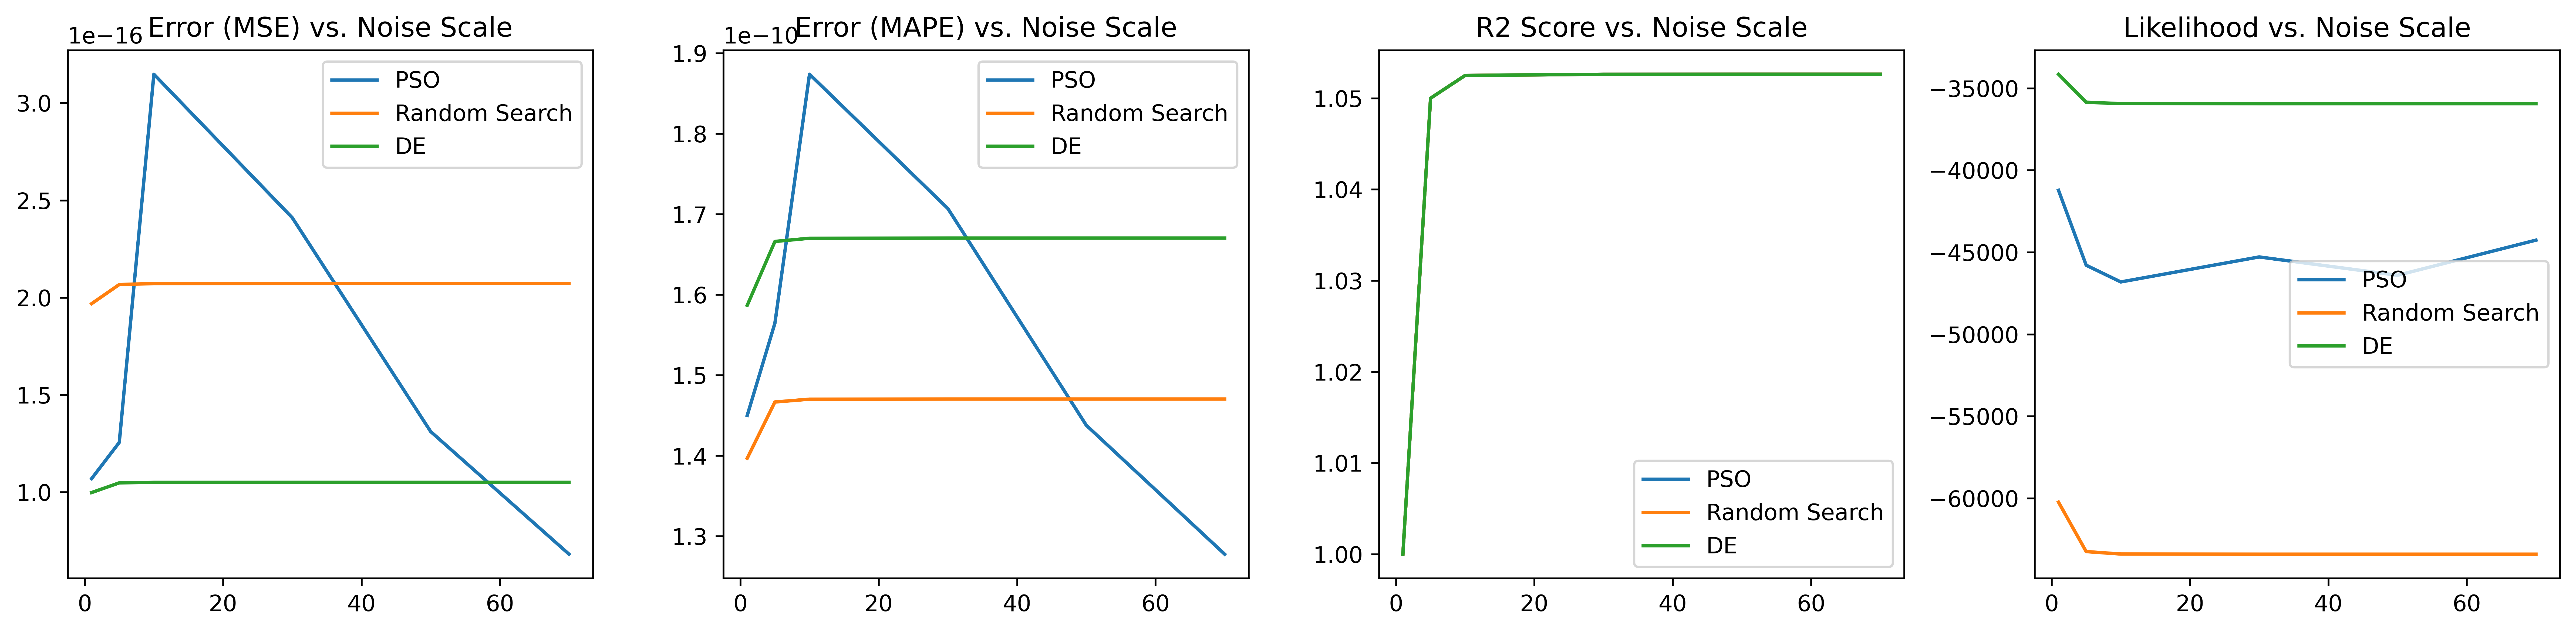

In [8]:
plt.figure(figsize=(16,4), dpi=600)
plt.subplot(141)
plt.title("Error (MSE) vs. Noise Scale")
plt.plot(noise_scales, errors_mse[0], label = "PSO")
plt.plot(noise_scales, errors_mse[1], label = "Random Search")
plt.plot(noise_scales, errors_mse[2], label = "DE")
plt.legend()
plt.subplot(142)
plt.title("Error (MAPE) vs. Noise Scale")
plt.plot(noise_scales, errors_mape[0], label = "PSO")
plt.plot(noise_scales, errors_mape[1], label = "Random Search")
plt.plot(noise_scales, errors_mape[2], label = "DE")
plt.legend()
plt.subplot(143)
plt.title("R2 Score vs. Noise Scale")
plt.plot(noise_scales, errors_r2[0], label = "PSO")
plt.plot(noise_scales, errors_r2[1], label = "Random Search")
plt.plot(noise_scales, errors_r2[2], label = "DE")
plt.legend()
plt.subplot(144)
plt.title("Likelihood vs. Noise Scale")
plt.plot(noise_scales, likelihood[0], label = "PSO")
plt.plot(noise_scales, likelihood[1], label = "Random Search")
plt.plot(noise_scales, likelihood[2], label = "DE")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
from utils_clean import generate_sample, DEOptim, RandomOptim, PSOOptim, visualize_meshgrid, get_likelihood_grids, visualize_pred_meshgrid
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

pso = PSOOptim(n_iters=100, n_particles=10, c1=0.5, c2=0.3, w=0.9, visualize=False)
optim = DEOptim(maxiter=100, visualize=False)

In [10]:
import plotly.express as px
from tqdm import tqdm
from utils_clean import generate_sample
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
import pandas as pd

noise_scales = [1, 5, 10, 30, 50, 70]
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)
n_train_data_points = 70
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5


num_iter = 10
df_results = pd.DataFrame({ "noise scale":[], "Log Likelihood PSO":[], "Log Likelihood RS":[], "Log Likelihood DE":[]})
for noise in tqdm(noise_scales):
    for i in range(0,num_iter):
        X, y = generate_sample(70, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)

        rs = RandomOptim(maxiter=1000, visualize=False, random_state=i)

        X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
        # pso
        gpr_pso = GaussianProcessRegressor(optimizer=pso.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_pso.fit(X.T, y[...,None])

        # rs
        gpr_rs = GaussianProcessRegressor(optimizer=rs.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_rs.fit(X.T, y[...,None])

        # de
        gpr_de = GaussianProcessRegressor(optimizer=optim.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_de.fit(X.T, y[...,None])

        df_results.loc[len(df_results)] = [noise, gpr_pso.log_marginal_likelihood_value_, gpr_rs.log_marginal_likelihood_value_, gpr_de.log_marginal_likelihood_value_]

print(df_results)
    

  0%|          | 0/6 [00:00<?, ?it/s]2022-08-09 11:59:32,136 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.46e+4
2022-08-09 11:59:35,237 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 34611.19083244466, best pos: [-1.07741729 -1.07050163]
2022-08-09 11:59:40,337 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.46e+4
2022-08-09 11:59:43,330 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 34611.12633257978, best pos: [-1.07524912 -1.07238636]
2022-08-09 11:59:46,288 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.46e+4
2022-08-09 11:59:49,251 - pyswarms.single.global_best - INFO - Optimi

    noise scale  Log Likelihood PSO  Log Likelihood RS  Log Likelihood DE
0           1.0       -34611.190832      -43460.232650      -34611.012889
1           1.0       -34611.126333      -34837.489700      -34611.012889
2           1.0       -34611.017911      -37487.054003      -34611.012889
3           1.0       -34611.018595      -37802.859931      -34611.012889
4           1.0       -34611.136933      -42079.251748      -34611.012889
5           1.0       -34611.096304      -41935.578641      -34611.012889
6           1.0       -34611.116158      -41438.685549      -34611.012890
7           1.0       -34611.128337      -44238.592447      -34611.012889
8           1.0       -34651.267647      -44025.233522      -34611.012889
9           1.0       -34611.016239      -36346.711984      -34611.012889
10          5.0       -41573.303577      -51637.403311      -41573.155901
11          5.0       -41573.260934      -46456.792541      -41573.155901
12          5.0       -41573.188216   

In [11]:
from scipy.stats import t

df_results_ = df_results.groupby(['noise scale'], as_index=False).agg({'Log Likelihood PSO':['mean','std'], 'Log Likelihood RS':['mean','std'], 'Log Likelihood DE':['mean','std']})

df_results_["conf_95_o_pso"] = t.ppf((1+0.95)/2., 20-1) * df_results_["Log Likelihood PSO"]["std"] + df_results_["Log Likelihood PSO"]["mean"]
df_results_["conf_95_u_pso"] = -t.ppf((1+0.95)/2., 20-1) * df_results_["Log Likelihood PSO"]["std"] + df_results_["Log Likelihood PSO"]["mean"]

df_results_["conf_95_o_rs"] = t.ppf((1+0.95)/2., 20-1) * df_results_["Log Likelihood RS"]["std"] + df_results_["Log Likelihood RS"]["mean"]
df_results_["conf_95_u_rs"] = -t.ppf((1+0.95)/2., 20-1) * df_results_["Log Likelihood RS"]["std"] + df_results_["Log Likelihood RS"]["mean"]

df_results_["conf_95_o_de"] = t.ppf((1+0.95)/2., 20-1) * df_results_["Log Likelihood DE"]["std"] + df_results_["Log Likelihood DE"]["mean"]
df_results_["conf_95_u_de"] = -t.ppf((1+0.95)/2., 20-1) * df_results_["Log Likelihood DE"]["std"] + df_results_["Log Likelihood DE"]["mean"]

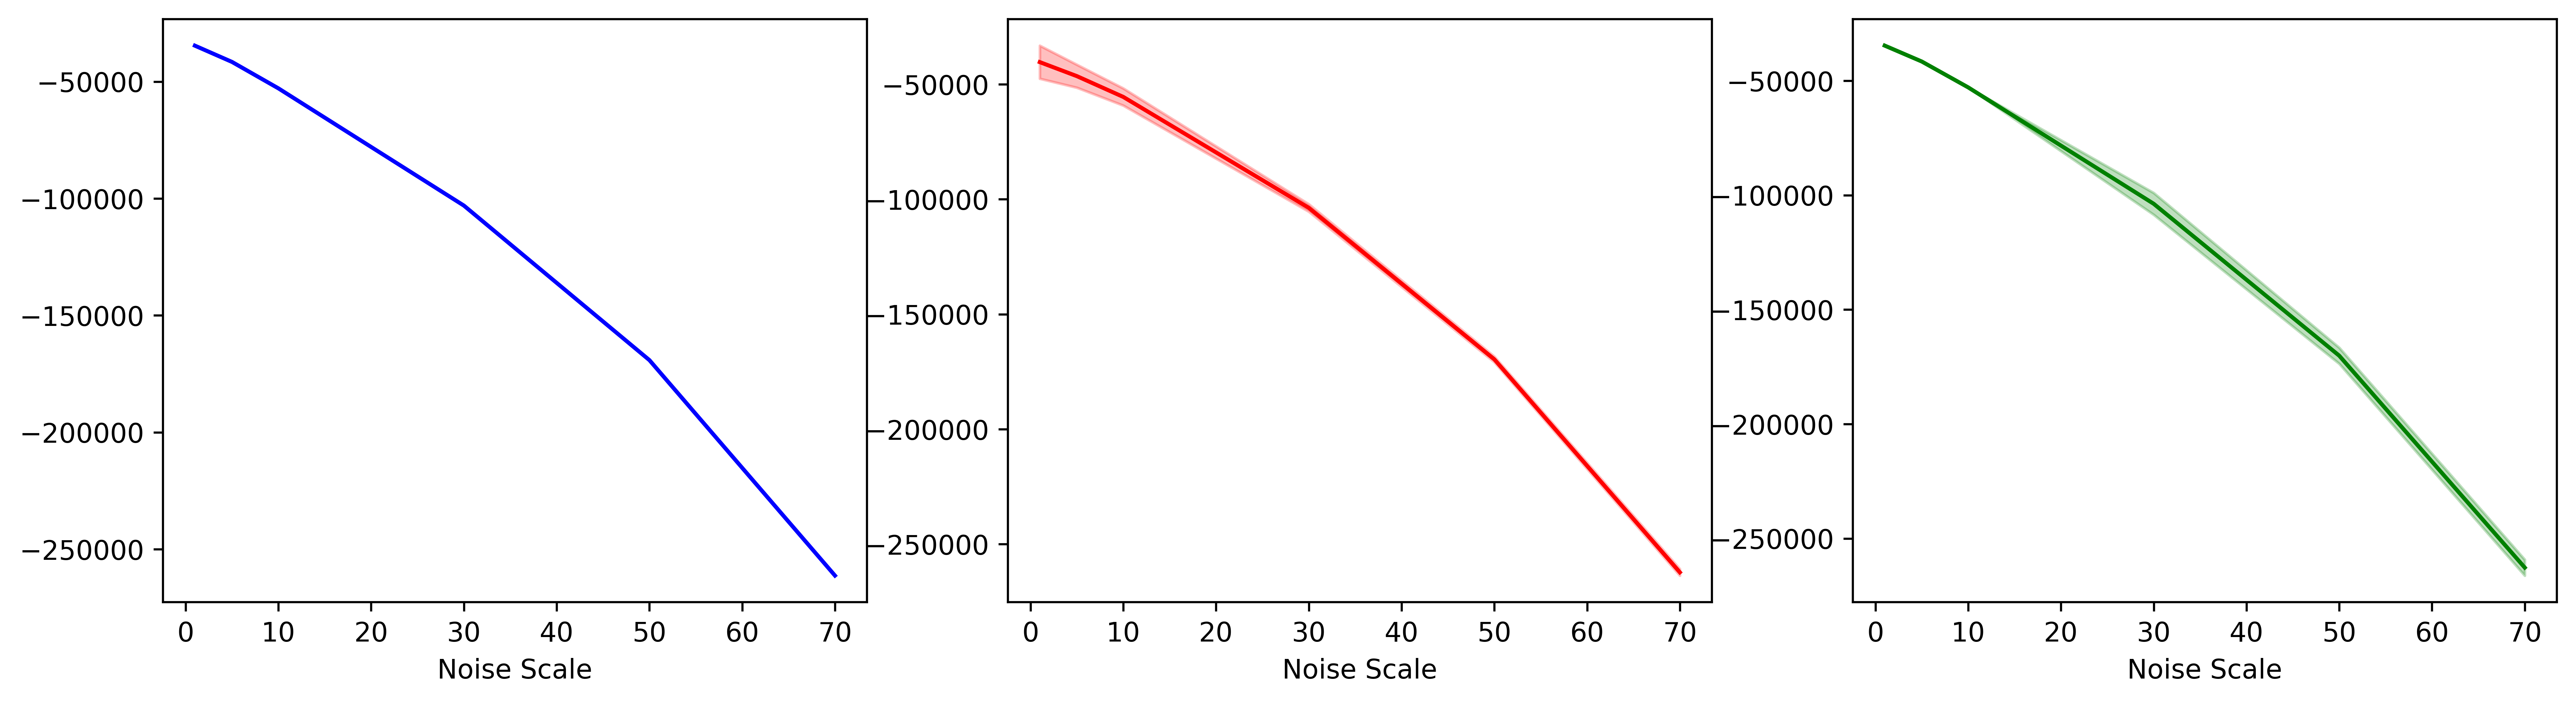

In [17]:
plt.figure(figsize=(16,4), dpi=600)
plt.subplot(131)
plt.plot(df_results_["noise scale"], df_results_["Log Likelihood PSO"]["mean"], color="b")
plt.fill_between(df_results_["noise scale"], df_results_["conf_95_u_pso"], df_results_["conf_95_o_pso"], color="b", alpha=.25)
plt.xlabel("Noise Scale")

plt.subplot(132)
plt.plot(df_results_["noise scale"], df_results_["Log Likelihood RS"]["mean"], color="r")
plt.fill_between(df_results_["noise scale"], df_results_["conf_95_u_rs"], df_results_["conf_95_o_rs"], color="r", alpha=.25)
plt.xlabel("Noise Scale")

plt.subplot(133)
plt.plot(df_results_["noise scale"], df_results_["Log Likelihood DE"]["mean"], color="g")
plt.fill_between(df_results_["noise scale"], df_results_["conf_95_u_de"], df_results_["conf_95_o_de"], color="g", alpha=.25)
plt.xlabel("Noise Scale")
plt.show()

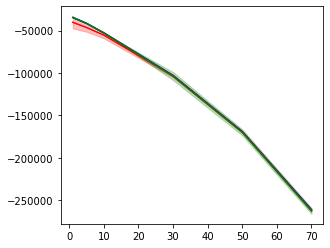

In [15]:
plt.figure(figsize=(16,4), dpi=600)
plt.subplot(131)
plt.plot(df_results_["noise scale"], df_results_["Log Likelihood PSO"]["mean"], color="b")
plt.fill_between(df_results_["noise scale"], df_results_["conf_95_u_pso"], df_results_["conf_95_o_pso"], color="b", alpha=.25)
plt.plot(df_results_["noise scale"], df_results_["Log Likelihood RS"]["mean"], color="r")
plt.fill_between(df_results_["noise scale"], df_results_["conf_95_u_rs"], df_results_["conf_95_o_rs"], color="r", alpha=.25)
plt.plot(df_results_["noise scale"], df_results_["Log Likelihood DE"]["mean"], color="g")
plt.fill_between(df_results_["noise scale"], df_results_["conf_95_u_de"], df_results_["conf_95_o_de"], color="g", alpha=.25)
plt.show()

In [46]:
import plotly.graph_objects as go
import pandas as pd

n = 100
x_grid = np.linspace(-5, -2.25, n)
y_grid = np.linspace(-5, -2.25, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
z = np.asarray([gpr_de.log_marginal_likelihood(X) for X in X_grid])
z = z.reshape(n, n)

fig = go.Figure(
    data=go.Surface(x=x_grid, y=y_grid, z=z),
    layout=go.Layout(
        title="Mt Bruno Elevation",
        width=500,
        height=500,
    ))

fig.update_layout(template="plotly", title="Likelihodd Landschaft")
fig.show()

In [9]:
df_results_

noise scale Log Likelihood PSO           Log Likelihood RS               \
                            mean       std              mean          std   
0         1.0      -34147.164587  0.327457      -40372.66689  3427.602894   
1         5.0      -34147.066496  0.137934      -40372.66689  3427.602894   
2        10.0      -34147.066910  0.243678      -40372.66689  3427.602894   
3        30.0      -34147.190807  0.538101      -40372.66689  3427.602894   
4        50.0      -34147.042143  0.191439      -40372.66689  3427.602894   
5        70.0      -34147.015795  0.126092      -40372.66689  3427.602894   

  Log Likelihood DE               conf_95_o_pso conf_95_u_pso  conf_95_o_rs  \
               mean           std                                             
0     -34146.927641  1.868453e-09 -34146.479212 -34147.849963 -33198.611584   
1     -34146.927641  1.059448e-09 -34146.777796 -34147.355196 -33198.611584   
2     -34146.927641  4.757900e-09 -34146.556885 -34147.576935 -33198.611584   
3     -34146.927641  8.944135e-11 -34146.064549 -34148.317065 -33198.611584   
4     -34146.927641  3.371786e-08 -34146.641456 -34147.442830 -33198.611584   
5     -34146.927641  1.625326e-10 -34146.751881 -34147.279710 -33198.611584   

   conf_95_u_rs  conf_95_o_de  conf_95_u_de  
                                             
0 -47546.722196 -34146.927641 -34146.927641  
1 -47546.722196 -34146.927641 -34146.927641  
2 -47546.722196 -34146.927641 -34146.927641  
3 -47546.722196 -34146.927641 -34146.927641  
4 -47546.722196 -34146.927641 -34146.927641  
5 -47546.722196 -34146.927641 -34146.927641